# SBI Life insurance Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import precision_score,recall_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Read Data

##### This is "SBI Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.

In [4]:
data = pd.read_csv('Downloads/SBI_Life_insurance.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


    age : age of policyholder 
    sex: gender of policy holder (female=0, male=1) 
    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 steps: average walking steps per day of policyholder 
    children: number of children / dependents of policyholder 
    smoker: smoking state of policyholder (non-smoke=0;smoker=1) 
    region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) 
    charges: individual medical costs billed by health insurance 
    insuranceclaim: yes=1, no=0

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [7]:
# checking numbers of unique value in each columns
uni = []
for col in data.columns:
    uni.append(len(np.unique(data[col])))
pd.DataFrame({"columns":data.columns,
             "Unique":uni})

,columns,Unique
0,age,47
1,sex,2
2,bmi,548
3,children,6
4,smoker,2
5,region,4
6,charges,1337
7,insuranceclaim,2


##### Visualizing terget variable

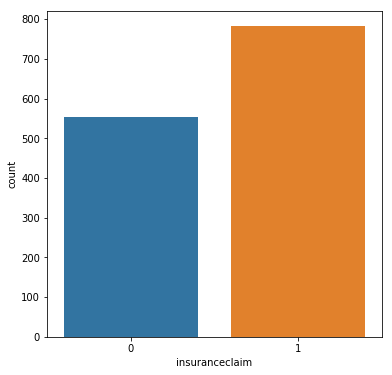

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x='insuranceclaim',data=data,)

In [9]:
np.unique(data['insuranceclaim']),np.unique(data['children'])

(array([0, 1]), array([0, 1, 2, 3, 4, 5]))

In [10]:
np.unique(data['sex']),np.unique(data['region'])

(array([0, 1]), array([0, 1, 2, 3]))

Text(0.5, 0, 'age distribition')

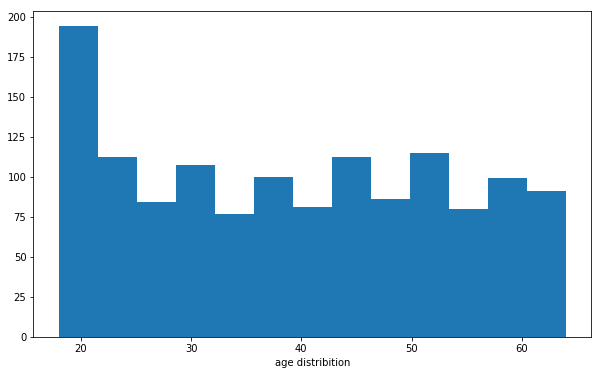

In [11]:
plt.figure(figsize=(10,6))
plt.hist(data['age'],bins=13)
plt.xlabel('age distribition')

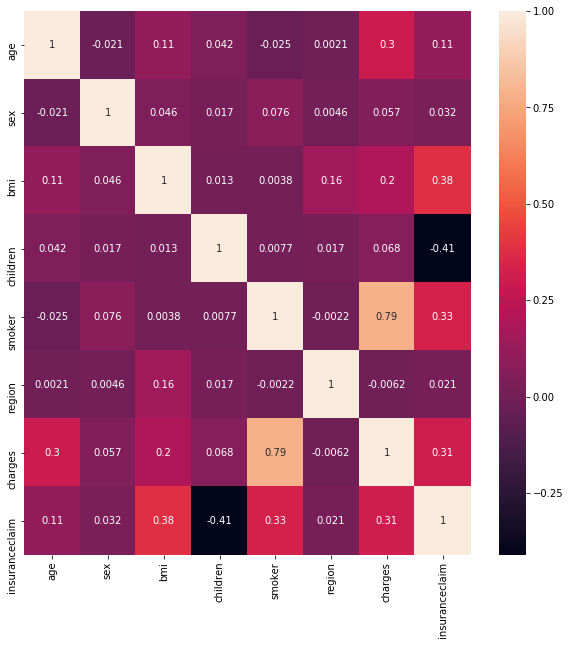

In [12]:
claim_corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(claim_corr,annot=True)

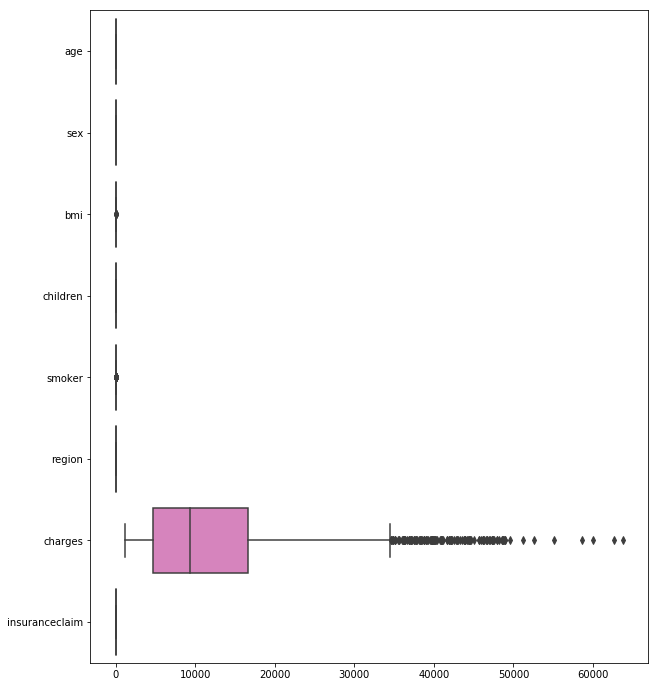

In [13]:
plt.figure(figsize=(10,12))
sns.boxplot(data = data,orient='h')

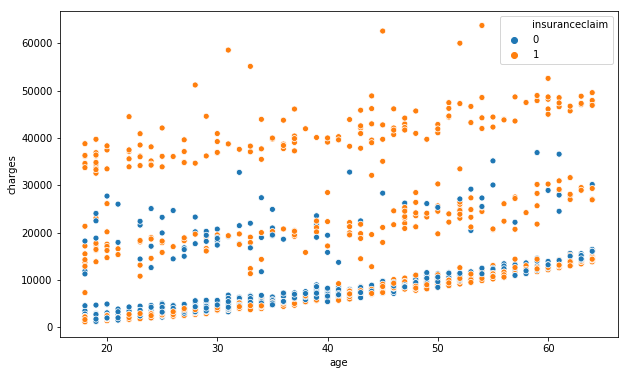

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='age',y='charges',hue='insuranceclaim')

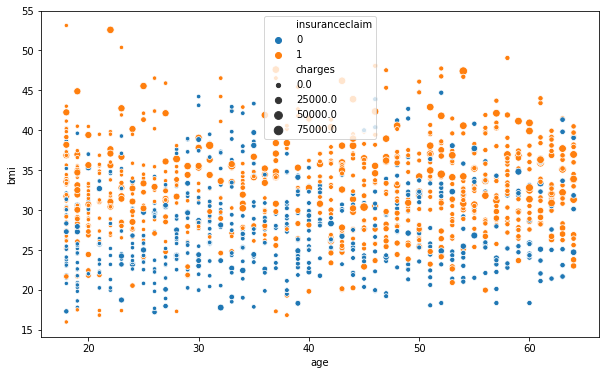

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='age',y='bmi',hue='insuranceclaim',size='charges')

#### Independent variable (X) & Target variable (y)

In [16]:
X = data.iloc[:,:-1].values
print(X.shape)
y = data.iloc[:,-1].values
y = y.reshape(-1, 1)
print(y.shape)

(1338, 7)
(1338, 1)


### Logistic Regresion

In [17]:
# function to find best value of Random_state
def someNum(num):
    xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=.33,random_state=num,stratify=y)
    logisticRegression = LogisticRegression()
    logisticRegression.fit(xtrain,ytrain)
    predicted  = logisticRegression.predict(xtest)
    f1score = f1_score(ytest,predicted)
    recallscore = recall_score(ytest,predicted)
    precisionscore = precision_score(ytest, predicted)
    acc_score = accuracy_score(ytest, predicted)
    return f1score,recallscore,precisionscore,acc_score

In [18]:
f1_score_=[]
recall_score_=[]
precision_score_=[]
acc_score_ =[]
for a in range(0,50):
    f1score,recallscore,precisionscore,acc_score = someNum(a)
    f1_score_.append(f1score)
    recall_score_.append(recallscore)
    precision_score_.append(precisionscore)
    acc_score_.append(acc_score)

In [19]:
# custom plot function
def listPlot(lis,n):
    plt.figure()
    plt.plot([x * 100 for x in lis])
    plt.xlabel('N value')
    plt.ylabel('(%)')
    plt.title("X = {} Y = {}".format([x for x in range(n)][np.argmax(lis)], (max(lis)*100)))
    plt.axhline(y=(max(lis)*100),color = 'r', linestyle = '--')
    plt.axvline(x=[x for x in range(n)][np.argmax(lis)],color = 'g', linestyle = '--')
    plt.show()

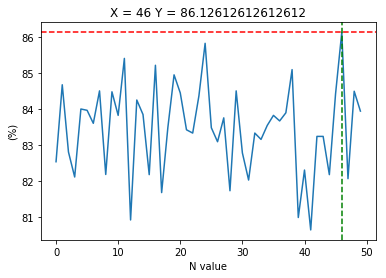

In [20]:
listPlot(f1_score_,50)

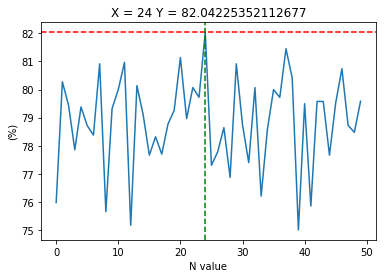

In [21]:
listPlot(precision_score_,50)

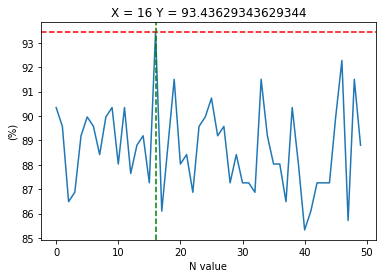

In [22]:
listPlot(recall_score_,50)

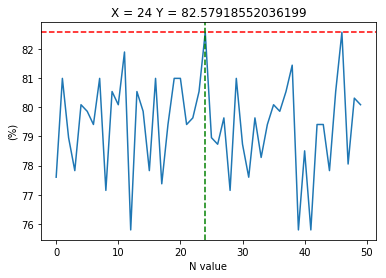

In [23]:
listPlot(acc_score_,50)

### Logistic Regression 
#### with optimal random_state

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((896, 7), (442, 7), (896, 1), (442, 1))

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
f1_score(y_test,lr_predict)*100

86.12612612612612

In [26]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[126  57]
 [ 20 239]]
82.57918552036199


## Logistic Regration
### with Scaled Inputs

In [27]:
from sklearn.preprocessing import StandardScaler
stdSclar = StandardScaler()
X_train_stdScaled = stdSclar.fit_transform(X_train)
X_test_stdScaled = stdSclar.fit_transform(X_test)

In [28]:
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_stdScaled, y_train)
lr_predict_scaled = lr_scaled.predict(X_test_stdScaled)
f1_score(y_test,lr_predict_scaled)*100

89.78805394990366

In [29]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict_scaled)
lr_acc_score = accuracy_score(y_test, lr_predict_scaled)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[156  27]
 [ 26 233]]
88.00904977375565


### Cross Validation Score

In [30]:
log_reg = cross_val_score(estimator = lr_scaled, X = X_train_stdScaled, y = y_train, cv = 50)
log_reg.mean()

0.8835397316821466

### Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
def maxDepthDT(depth):
    dt = DecisionTreeClassifier(max_depth=depth,random_state=0)
    dt.fit(X_train_stdScaled,y_train)
    dt_predict = dt.predict(X_test_stdScaled)
    return (dt.score(X_train_stdScaled,y_train)),dt.score(X_test_stdScaled,y_test)
    

In [33]:
train_acc = []
validate_acc = []
for i in range(1,21):
    train_a,val_a = maxDepthDT(i)
    train_acc.append(train_a)
    validate_acc.append(val_a)

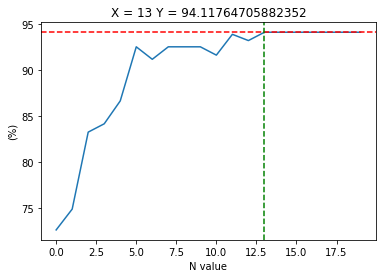

In [34]:
listPlot(validate_acc,20)

In [35]:
trade = pd.DataFrame({
    'max depth':range(1,21),
    'training acc':train_acc,
    'validation acc':validate_acc
})
trade

,max depth,training acc,validation acc
0,1,0.713170,0.726244
1,2,0.764509,0.748869
2,3,0.850446,0.832579
3,4,0.870536,0.841629
4,5,0.907366,0.866516
5,6,0.945312,0.925339
6,7,0.959821,0.911765
7,8,0.973214,0.925339
8,9,0.974330,0.925339
9,10,0.978795,0.925339


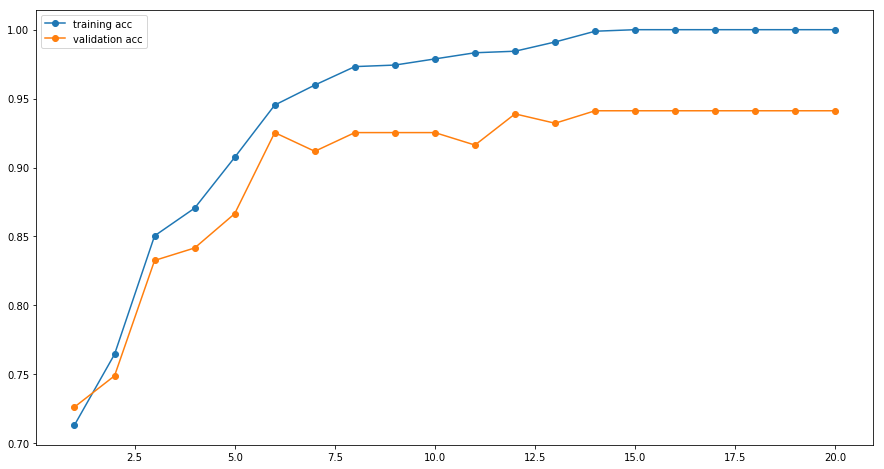

In [36]:
plt.figure(figsize=(15,8))
plt.plot(trade['max depth'],trade['training acc'],marker='o')
plt.plot(trade['max depth'],trade['validation acc'],marker='o')
plt.legend()

In [37]:

dt = DecisionTreeClassifier(random_state=0,max_depth=14)
dt.fit(X_train_stdScaled,y_train)
dt_predict = dt.predict(X_test_stdScaled)
dt.score(X_train_stdScaled,y_train)*100

99.88839285714286

In [38]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[173  10]
 [ 16 243]]
94.11764705882352


### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_stdScaled, y_train)
rf_predict=rf.predict(X_test_stdScaled)

In [41]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[169  14]
 [ 38 221]]
88.23529411764706


In [42]:
pd.Series(rf.feature_importances_,index=data.columns[:-1])

age         0.102203
sex         0.006505
bmi         0.336034
children    0.255080
smoker      0.092196
region      0.028086
charges     0.179897
dtype: float64

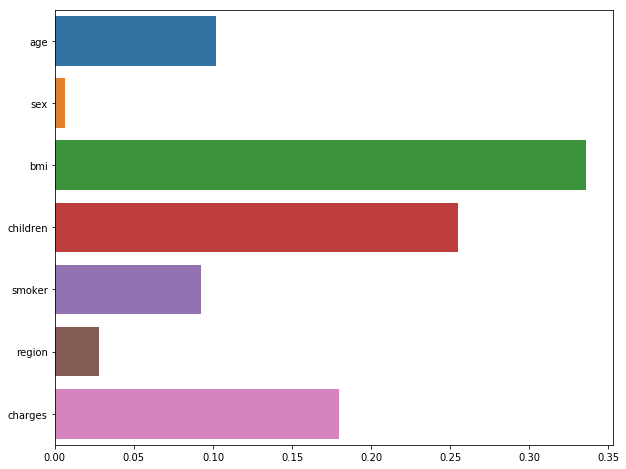

In [43]:
plt.figure(figsize=(10,8))
sns.barplot(x =rf.feature_importances_,y=data.columns[:-1])

### Support Vector Classification

In [44]:
from sklearn.svm import SVC

In [45]:
#we shall use the rbf kernel first and check the accuracy
lin_svc = SVC(kernel='linear')
lin_svc.fit(X_train_stdScaled, y_train)
lin_svc=rf.predict(X_test_stdScaled)

In [46]:
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)


[[169  14]
 [ 38 221]]
88.23529411764706


In [47]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train_stdScaled, y_train)
rbf_svc=rf.predict(X_test_stdScaled)

In [48]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
rbf_svc_acc_score = accuracy_score(y_test, rf_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)


[[169  14]
 [ 38 221]]
88.23529411764706


###  Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
def randState(n):
    gbc = GradientBoostingClassifier(random_state=34,n_estimators=n*10)
    gbc.fit(X_train_stdScaled,y_train)
    gbc_predict = gbc.predict(X_test_stdScaled)
    return (gbc.score(X_train_stdScaled,y_train)),gbc.score(X_test_stdScaled,y_test)

In [51]:
train_ac = []
validate_ac = []
for i in range(1,16):
    train_a,val_a = randState(i)
    train_ac.append(train_a)
    validate_ac.append(val_a)

In [52]:
trade_n = pd.DataFrame({
    'n_estimator':[x*10 for x in range(1,16)],
    'training acc':train_ac,
    'validation acc':validate_ac
})
trade_n.head(10)

,n_estimator,training acc,validation acc
0,10,0.920759,0.895928
1,20,0.940848,0.914027
2,30,0.957589,0.920814
3,40,0.963170,0.936652
4,50,0.968750,0.943439
5,60,0.985491,0.954751
6,70,0.988839,0.963801
7,80,0.992188,0.959276
8,90,0.992188,0.959276
9,100,0.992188,0.957014


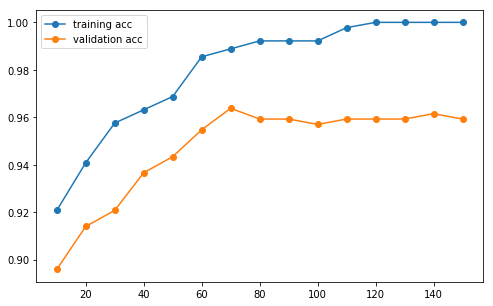

In [53]:
plt.figure(figsize=(8,5))
plt.plot(trade_n['n_estimator'],trade_n['training acc'],marker='o')
plt.plot(trade_n['n_estimator'],trade_n['validation acc'],marker='o')
plt.legend()

In [54]:
gbc = GradientBoostingClassifier(random_state=34,n_estimators=70)
gbc.fit(X_train_stdScaled,y_train)
gbc.score(X_train_stdScaled,y_train),gbc.score(X_test_stdScaled,y_test)

(0.9888392857142857, 0.9638009049773756)

### XG Boost Classifier

In [55]:
from xgboost import XGBClassifier

In [56]:
xgbc = XGBClassifier(random_state=34,colsample_bytree=0.7,max_depth=4)
xgbc.fit(X_train_stdScaled,y_train)
xgbc.score(X_train_stdScaled,y_train),xgbc.score(X_test_stdScaled,y_test)

(0.9899553571428571, 0.9298642533936652)

### Ada Boost Classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
abc = AdaBoostClassifier(random_state=34,base_estimator=RandomForestClassifier(random_state=34),n_estimators=100,learning_rate=0.01)
abc.fit(X_train_stdScaled,y_train)
abc.score(X_train_stdScaled,y_train),abc.score(X_test_stdScaled,y_test)

(1.0, 0.9253393665158371)